### Installasi dan Importing Dataset

In [50]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing data yang telah diambil dari scrapping di twitter menggunakan snscrape

In [52]:
import re, nltk, itertools
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import networkx as nx


factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

'Done'

In [53]:
df_anies = pd.read_csv('https://raw.githubusercontent.com/rizkyazriel/Datasets/main/anies_baswedan.csv')
df_ganjar = pd.read_csv('https://raw.githubusercontent.com/rizkyazriel/Datasets/main/ganjar%20pranowo.csv')

In [54]:
print(df_anies.shape)
df_anies.head()

(2500, 3)


,Date,User,Tweet
0,2022-12-28 01:52:36+00:00,Siantar72,Pak @musniumar @aniesbaswedan apakah perkataan...
1,2022-12-28 01:52:33+00:00,PallakaGO,@abu_waras Masyarakat solo memberikan masukan ...
2,2022-12-28 01:52:10+00:00,IND_ONE_SIARAYA,@adoer_psrahad @hayatur_rahman @BosPurwa @anie...
3,2022-12-28 01:52:04+00:00,donyzielinski,Anies Baswedan bangsat permainkan publik!! \n\...
4,2022-12-28 01:50:57+00:00,m4c4n025,@BosPurwa @aniesbaswedan Mashaa Allaah tabarok...


In [55]:
print(df_ganjar.shape)
df_ganjar.head()

(2500, 3)


,Date,User,Tweet
0,2022-12-27 14:07:18+00:00,haimasdep1,@GanjaranApp Kebangkitan UMKM di tangan pak Ga...
1,2022-12-27 14:06:28+00:00,tia79804848,"@vita_AVP aku yakin bgt dia ngk bakal menang,,..."
2,2022-12-27 14:06:11+00:00,AnakInd0,ALHAMDULILLAH. Banyak warga yg diperhatikan ol...
3,2022-12-27 14:05:34+00:00,Bisniscom,Ganjar Pranowo Beri Tips Agar Ekonomi RI Tak K...
4,2022-12-27 14:05:27+00:00,haimasdep1,@GanjaranApp Akhirnya mahasiswa Papua yg tidak...


### Text Mining

Membersihkan isi dari Tweet untuk melakukan visualisasi dari utas yang ada pada setiap pasangan calon presiden 2024

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
Sastrawi_StopWords_id = factory.get_stop_words()
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)
Sastrawi_StopWords_id.add('kok')
Sastrawi_StopWords_id.add('bapak')
Sastrawi_StopWords_id.add('nya')
Sastrawi_StopWords_id.add('kalo')
Sastrawi_StopWords_id.add('jadi')
Sastrawi_StopWords_id.add('pak')

improperWords = {'km':'kamu', 'gpp':'gapapa', 'knp':'kenapa', 'tdk':'tidak', 
                 'org':'orang', 'kpn':'kapan', 'udh':'udah', 'tsb':'tersebut',
                 'kmrn':'kemarin', 'bsk':'besok', 'tp':'tapi', 'bgt':'banget',
                 'gak':'tidak', 'dgn':'dengan'}

def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    for i, twt in enumerate(Tokens):
        if twt in  improperWords.keys():
            Tokens[i] = improperWords[twt]
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx # Silahkan latihan tambahkan penanganan Slang/Singkatan

In [58]:
df_anies['clean_tweet'] = df_anies['Tweet'].apply(cleanText)
df_anies.head()

,Date,User,Tweet,clean_tweet
0,2022-12-28 01:52:36+00:00,Siantar72,Pak @musniumar @aniesbaswedan apakah perkataan...,musniumar aniesbaswedan kata bung aniesbasweda...
1,2022-12-28 01:52:33+00:00,PallakaGO,@abu_waras Masyarakat solo memberikan masukan ...,abu waras masyarakat solo beri masuk harga ani...
2,2022-12-28 01:52:10+00:00,IND_ONE_SIARAYA,@adoer_psrahad @hayatur_rahman @BosPurwa @anie...,adoer psrahad hayatur rahman bospurwa aniesbas...
3,2022-12-28 01:52:04+00:00,donyzielinski,Anies Baswedan bangsat permainkan publik!! \n\...,anies baswedan bangsat main publik htifpidukun...
4,2022-12-28 01:50:57+00:00,m4c4n025,@BosPurwa @aniesbaswedan Mashaa Allaah tabarok...,bospurwa aniesbaswedan mashaa allaah tabarokal...


In [59]:
df_ganjar['clean_tweet'] = df_ganjar['Tweet'].apply(cleanText)
df_ganjar.head()

,Date,User,Tweet,clean_tweet
0,2022-12-27 14:07:18+00:00,haimasdep1,@GanjaranApp Kebangkitan UMKM di tangan pak Ga...,ganjaranapp bangkit umkm tangan ganjar hasil d...
1,2022-12-27 14:06:28+00:00,tia79804848,"@vita_AVP aku yakin bgt dia ngk bakal menang,,...",vita avp aku yakin banget ngk bakal menang kar...
2,2022-12-27 14:06:11+00:00,AnakInd0,ALHAMDULILLAH. Banyak warga yg diperhatikan ol...,alhamdulillah banyak warga perhati gubernur ng...
3,2022-12-27 14:05:34+00:00,Bisniscom,Ganjar Pranowo Beri Tips Agar Ekonomi RI Tak K...,ganjar pranowo beri tips ekonomi tak kena anca...
4,2022-12-27 14:05:27+00:00,haimasdep1,@GanjaranApp Akhirnya mahasiswa Papua yg tidak...,ganjaranapp akhir mahasiswa papua pulang pas r...


### Text Visualisasi Anies Baswedan

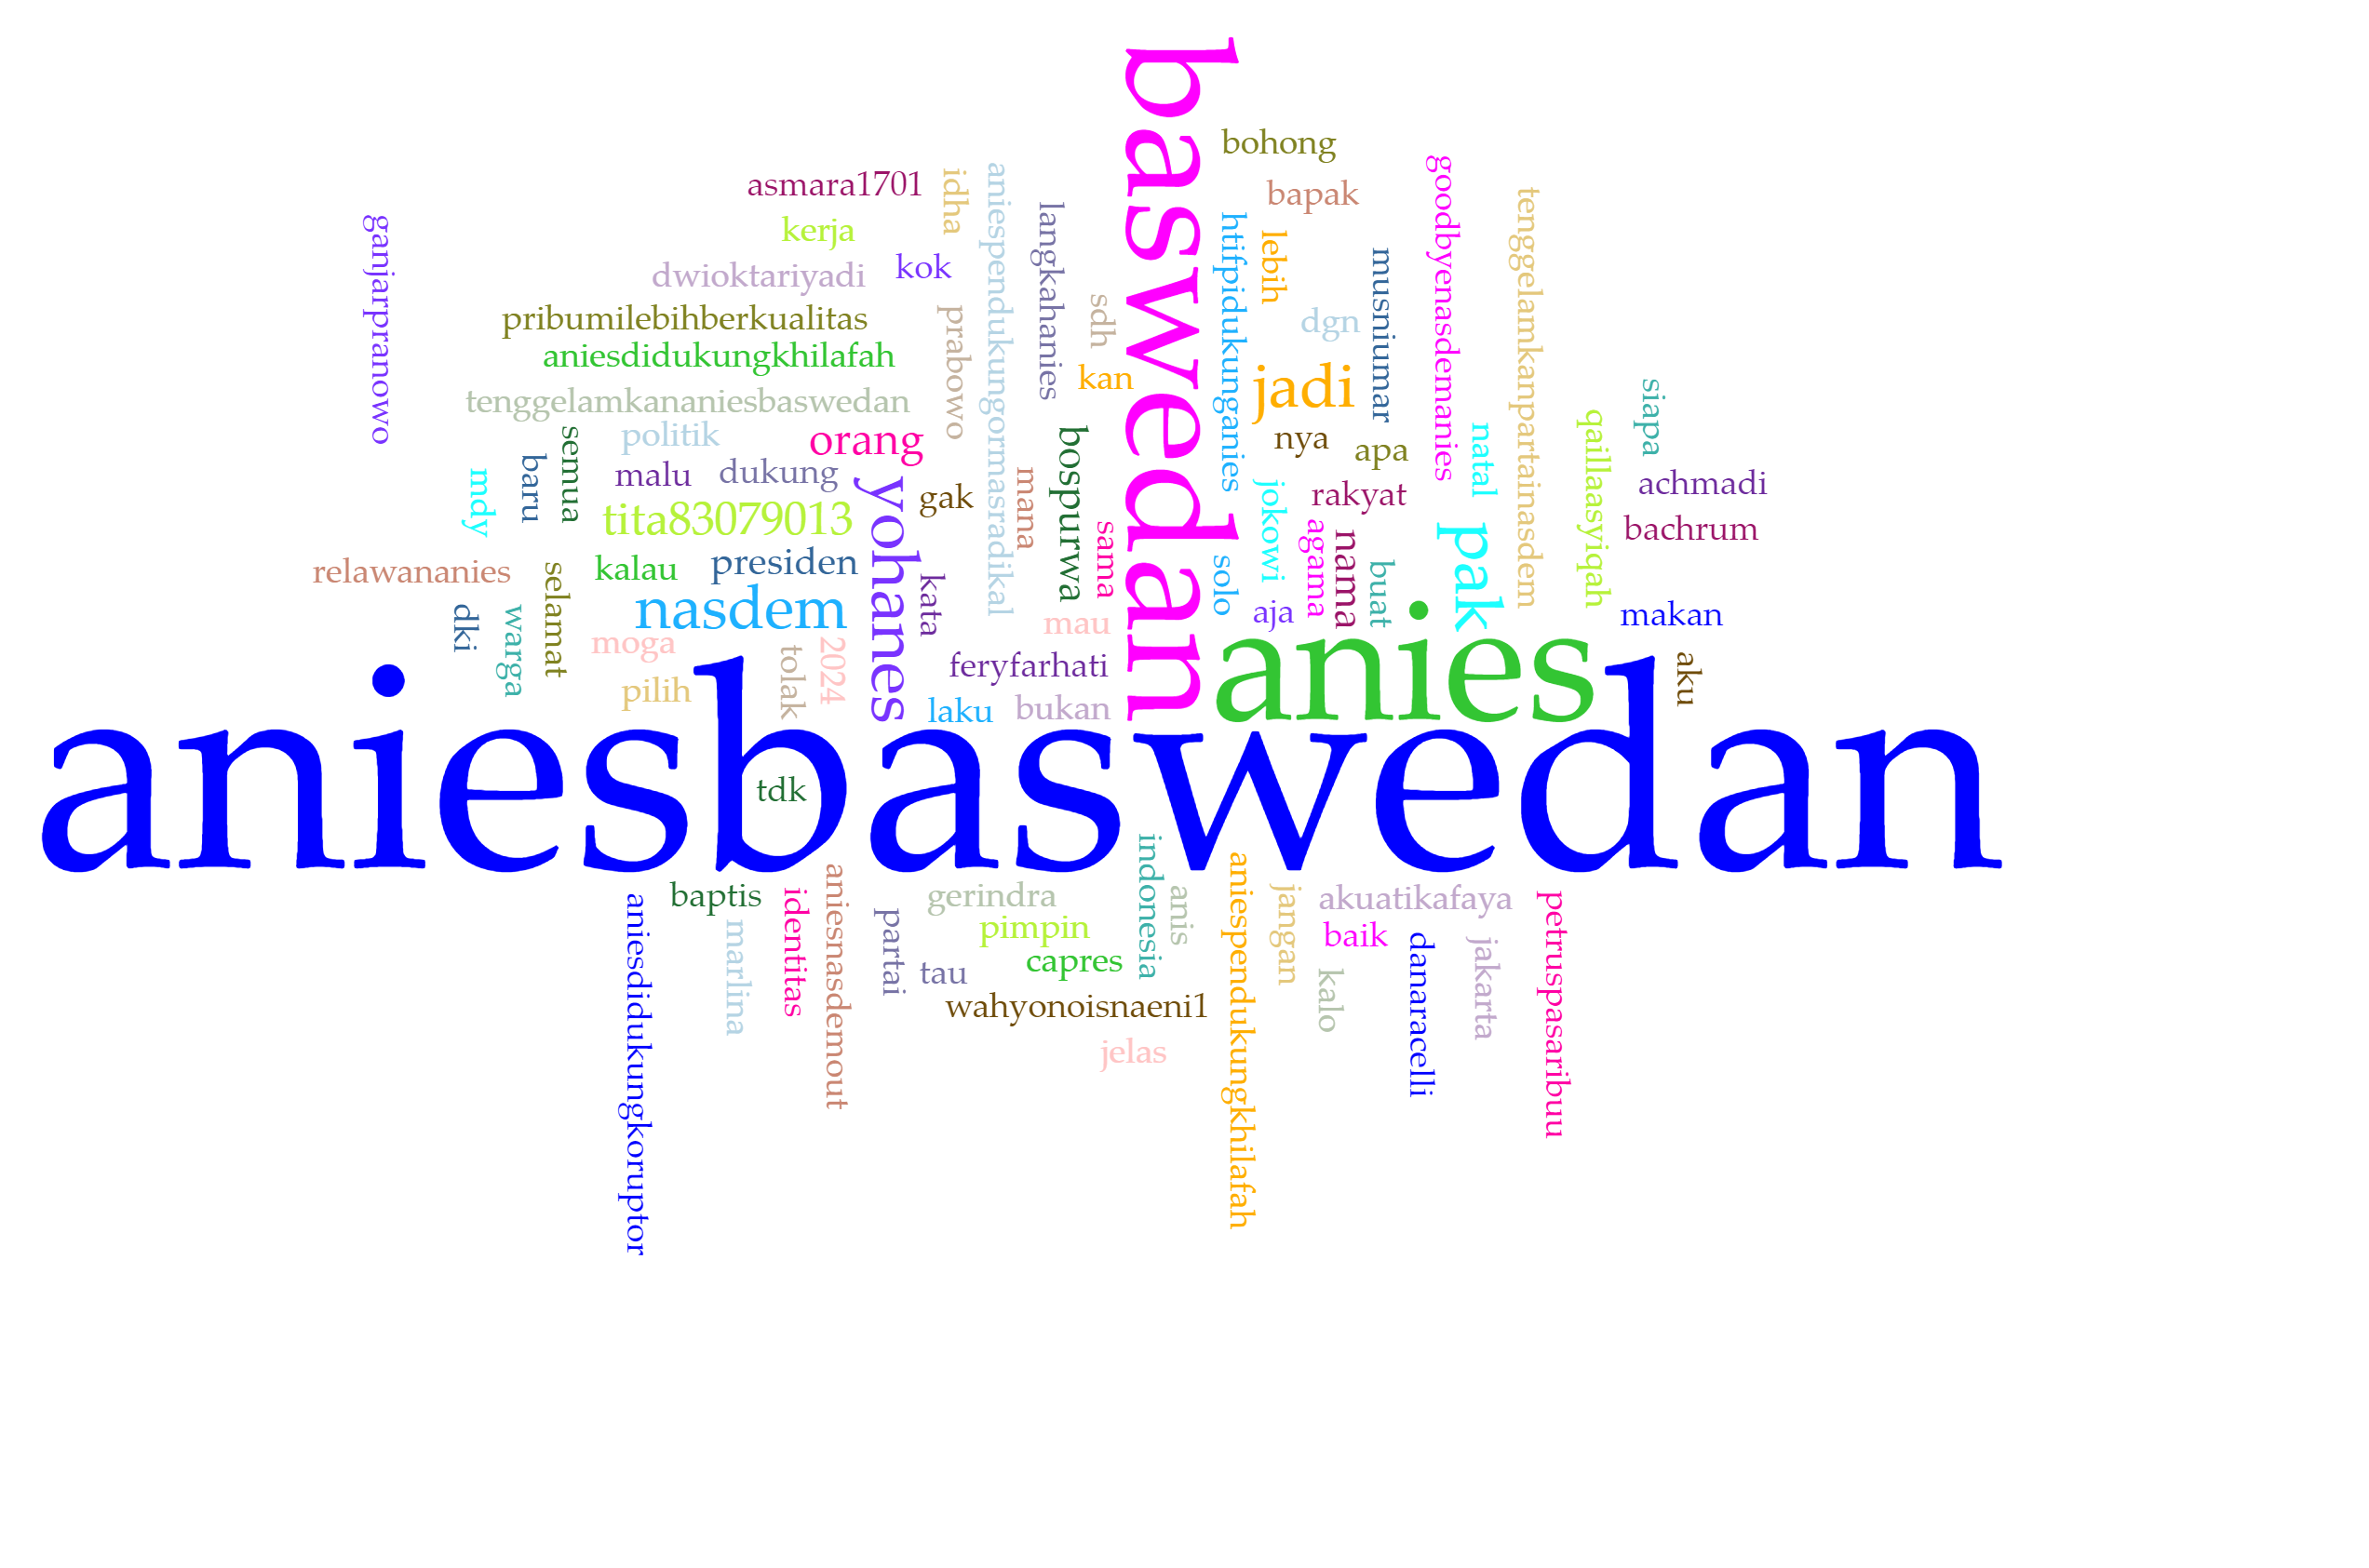

Terlihat bahwa banyak kata yang kurang begitu memiliki arti, seperti halnya hanya nama dari pasangan calon presiden 2024. Selanjutnya kita akan menghapus nama dari pasangan calon presiden 2024 agar kata yang didapat bisa lebih variatif dan diharapkan bisa menjadi insight.
Kita akan menambahkan nama pasangan calon presiden 2024 ke dalam stopwords.

In [60]:
Sastrawi_StopWords_id.add('anies')
Sastrawi_StopWords_id.add('baswedan')
Sastrawi_StopWords_id.add('aniesbaswedan')
Sastrawi_StopWords_id.add('ganjar')
Sastrawi_StopWords_id.add('pranowo')
Sastrawi_StopWords_id.add('yohanes')
Sastrawi_StopWords_id.add('orang')
Sastrawi_StopWords_id.add('apa')
Sastrawi_StopWords_id.add('mau')
Sastrawi_StopWords_id.add('tita83079013')

In [61]:
def cleanWord(text):
    docx = unidecode(unescape(text.lower().strip()))
    Tokens = TextBlob(docx).words
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2])
    return docx

In [62]:
df_anies['clean_tweet'] = df_anies['clean_tweet'].apply(cleanWord)

Kita lakukan visuaslisasi ulang dengan data text yang sudah dimodifikasi 

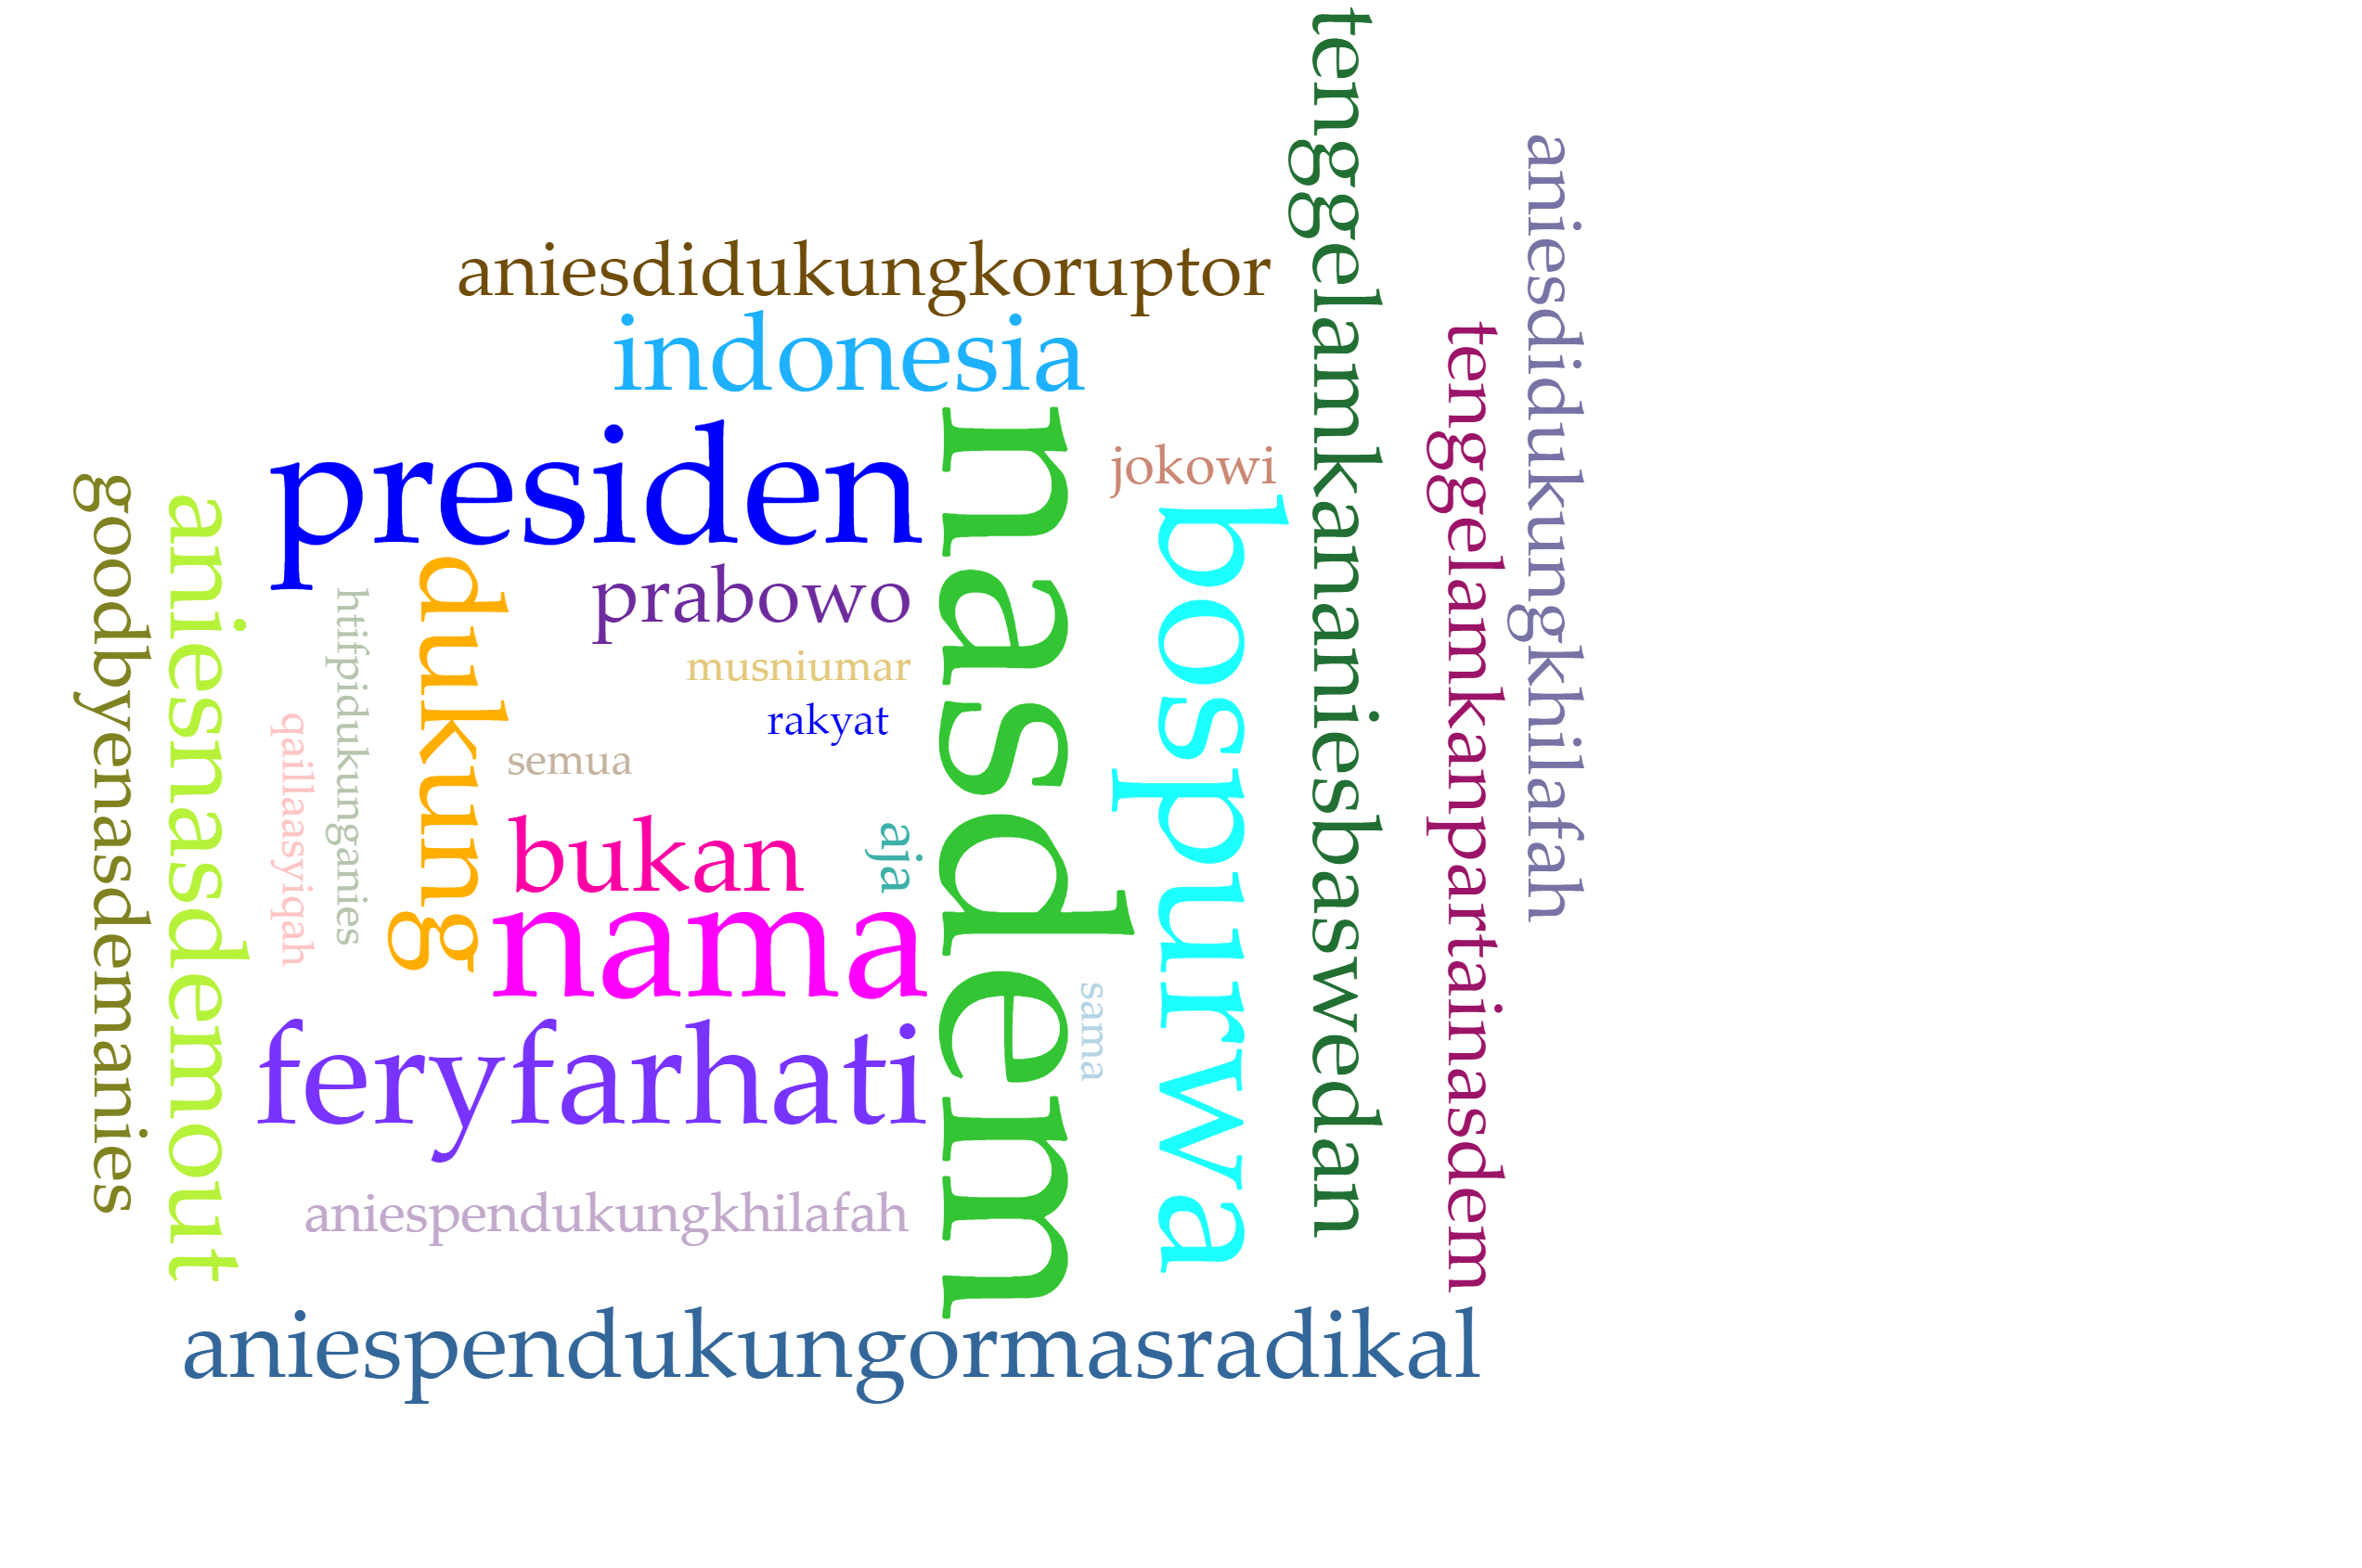

Berdasarkan hasil Wordcloud dengan topik 'Anies Baswedan' terdapat beberapa kata negatif (ujaran kebencian) yang paling sering muncul yaitu 'good bye nasdem anies', 'anies nasdem out', 'anies pendukung ormas ardikal', 'tenggelamkan anies baswedan', 'anies didukungf koruptor', dll


### Text Visualisasi Ganjar Pranowo

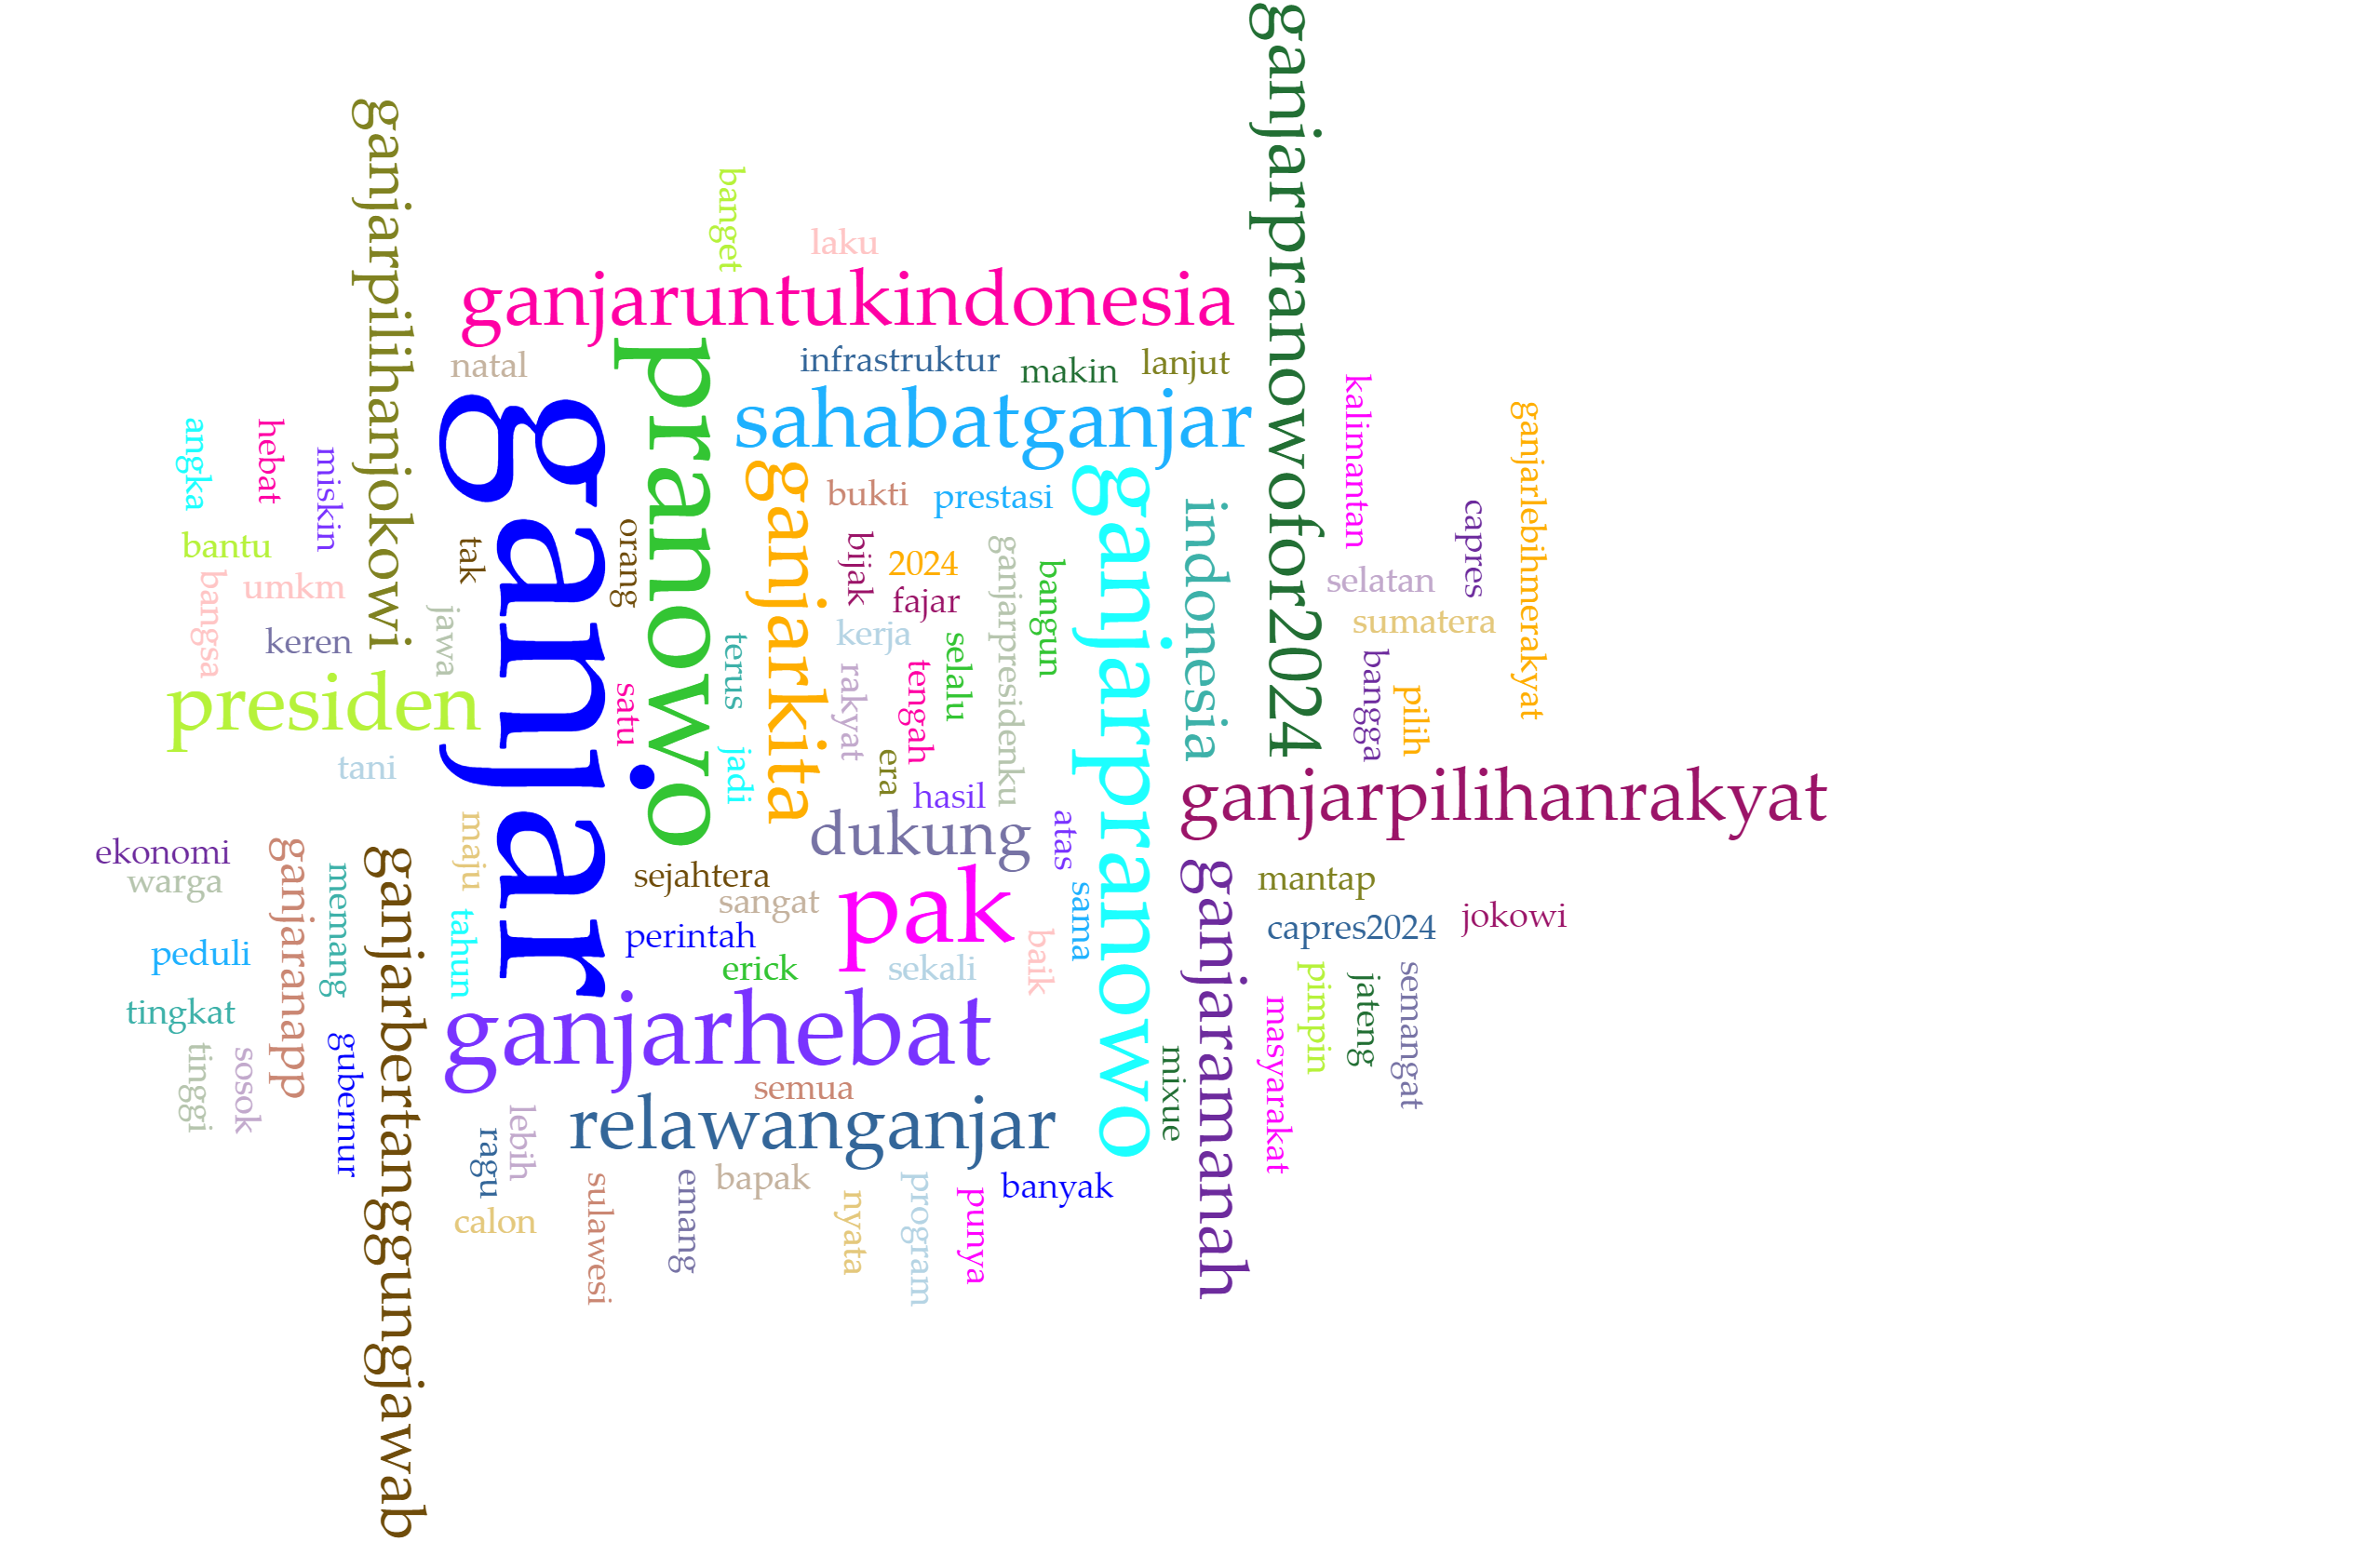

Setelah melakukan stopword, dengan menambahkan kata 'anies', 'baswedan', 'aniesbaswedan', 'ganjar', 'pranowo' ke stopword

In [63]:
def cleanWord(text):
    docx = unidecode(unescape(text.lower().strip()))
    Tokens = TextBlob(docx).words
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2])
    return docx

In [64]:
df_ganjar['clean_tweet'] = df_ganjar['clean_tweet'].apply(cleanWord)

Kita lakukan visuaslisasi ulang dengan data text yang sudah dimodifikasi

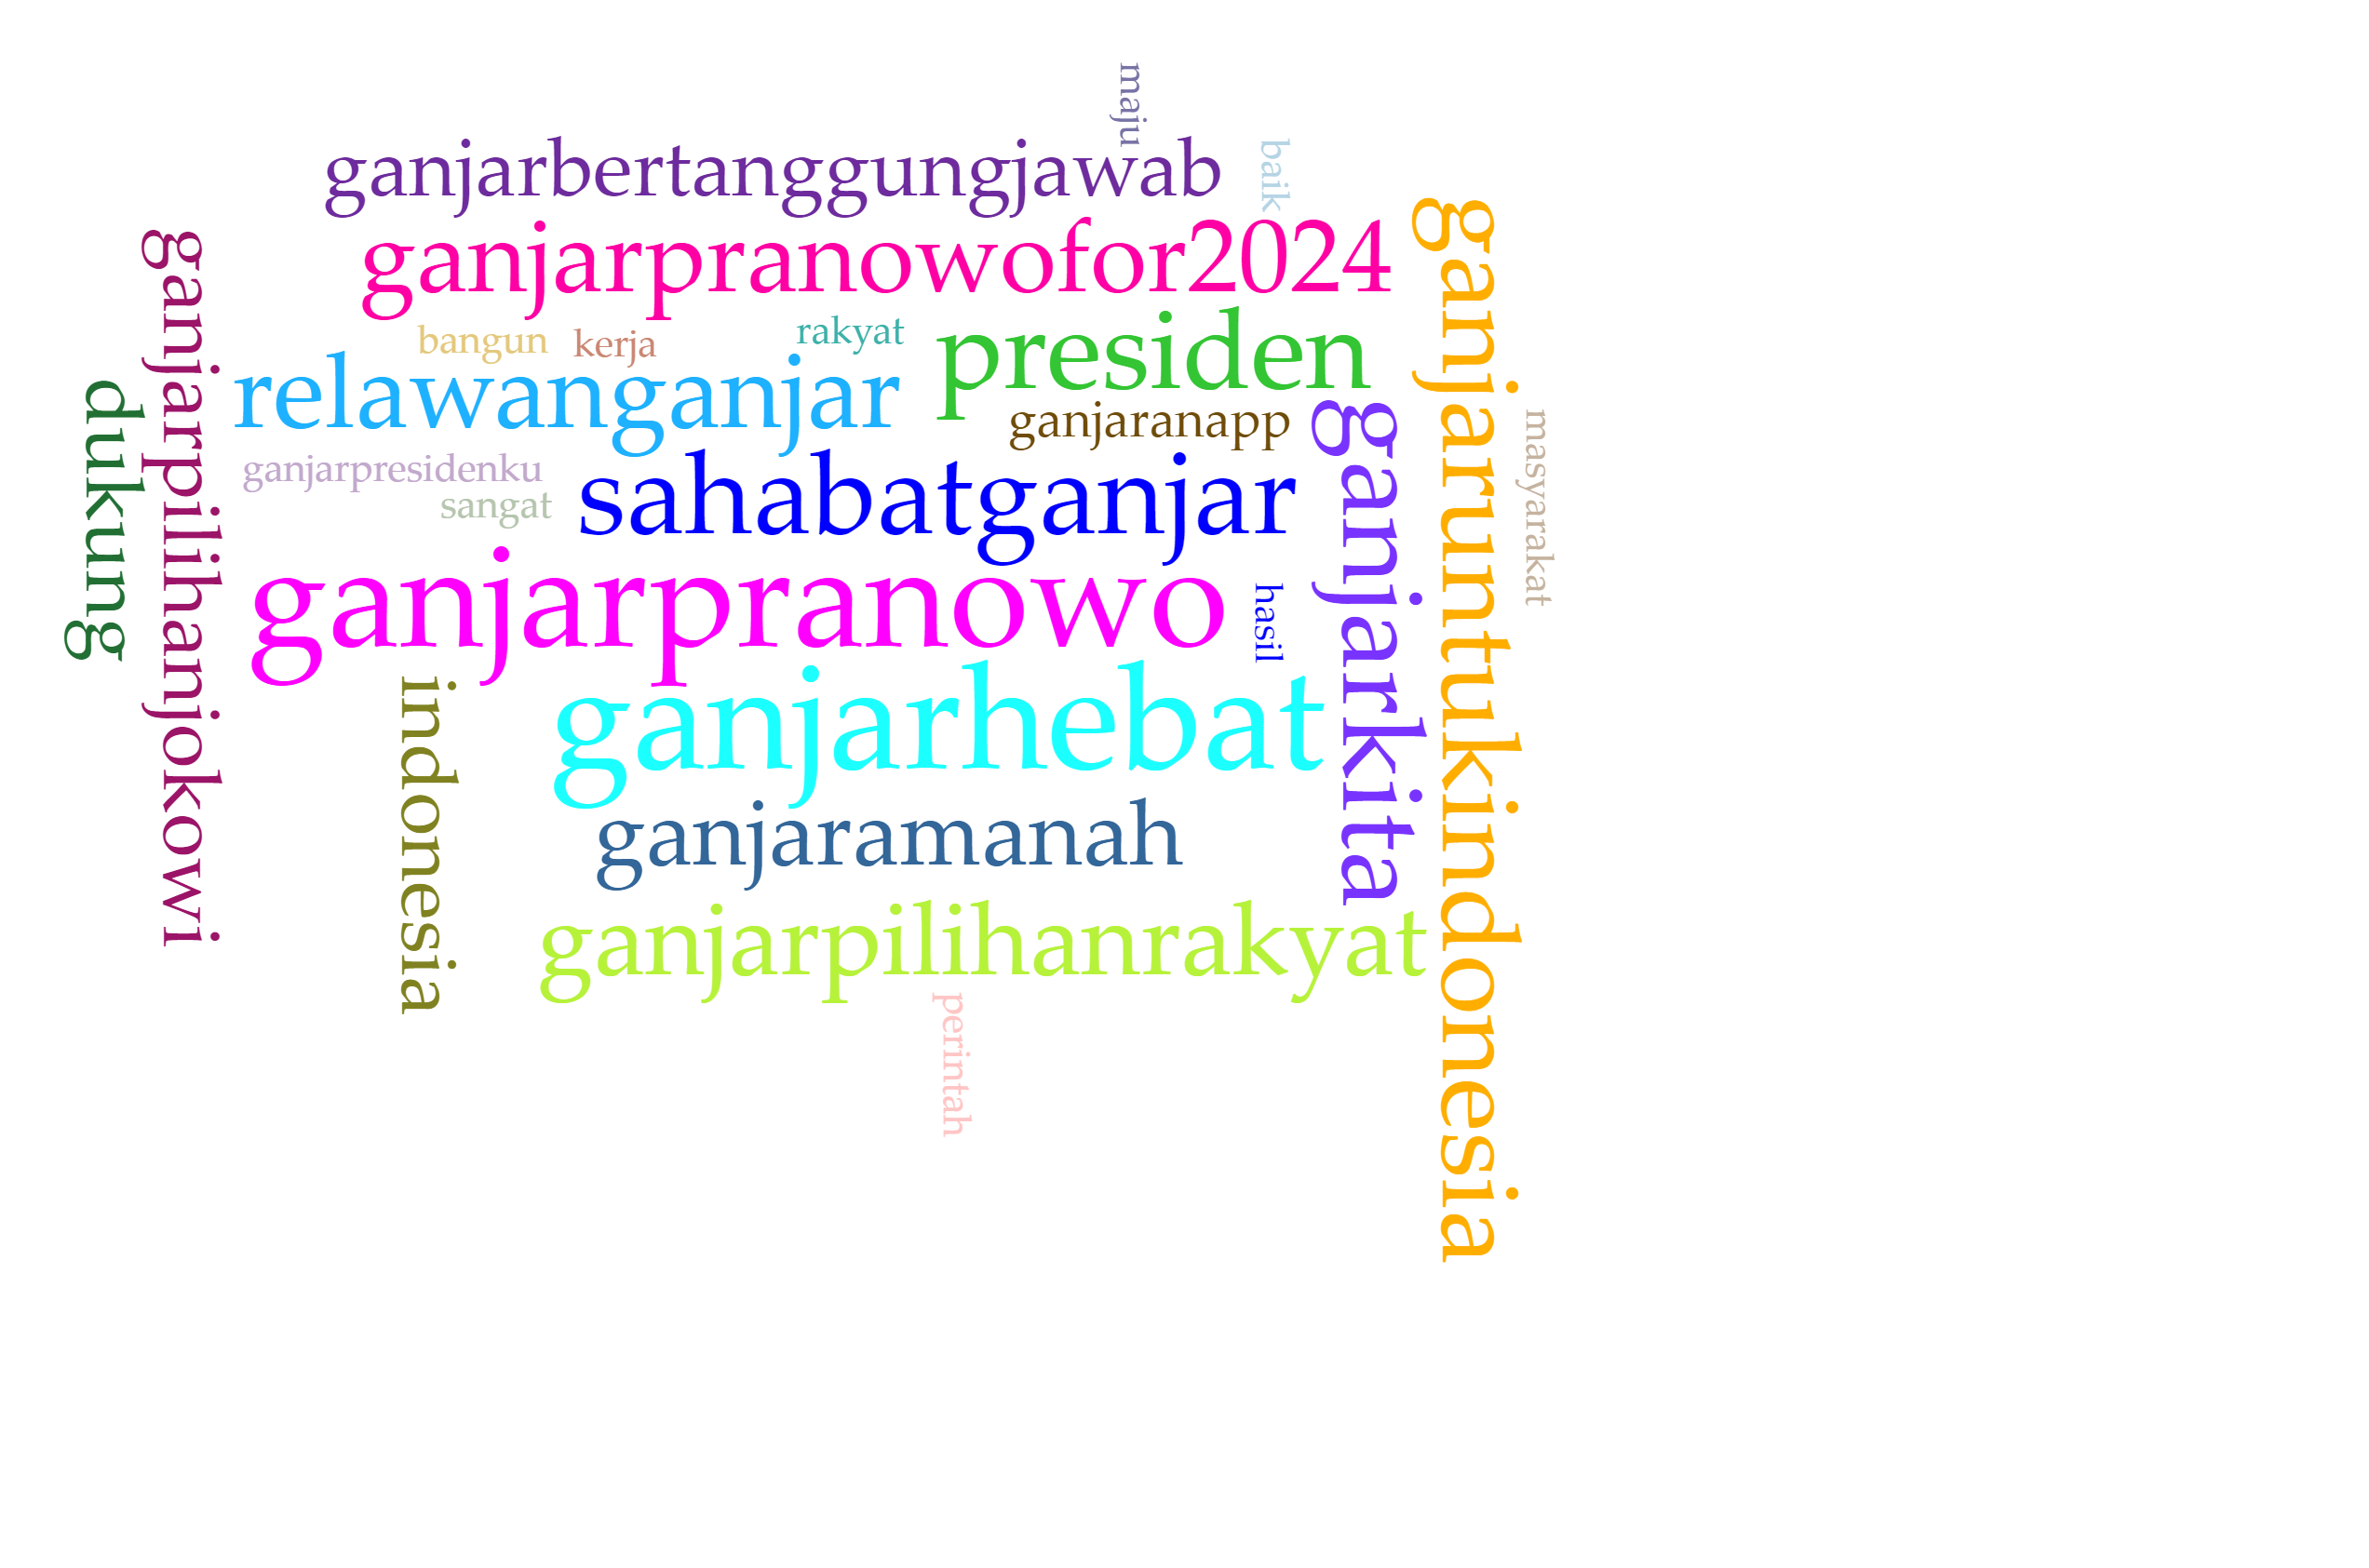

Berdasarkan hasil Wordcloud dengan topik 'Ganjar Pranowo' terdapat beberapa kata positif (dukungan) yang paling sering muncul yaitu "Sahabat ganjar", "Ganjar hebat", "Ganjar amanah", "Ganjar pilihan rakyat", dll

### Social Network Analysis & Membuat Graph

In [65]:
import networkx as nx

In [66]:
df = pd.concat([df_anies, df_ganjar])
df.head()

,Date,User,Tweet,clean_tweet
0,2022-12-28 01:52:36+00:00,Siantar72,Pak @musniumar @aniesbaswedan apakah perkataan...,musniumar kata bung msh laku atsu tatakujiyati...
1,2022-12-28 01:52:33+00:00,PallakaGO,@abu_waras Masyarakat solo memberikan masukan ...,abu waras masyarakat solo beri masuk harga ser...
2,2022-12-28 01:52:10+00:00,IND_ONE_SIARAYA,@adoer_psrahad @hayatur_rahman @BosPurwa @anie...,adoer psrahad hayatur rahman bospurwa implemen...
3,2022-12-28 01:52:04+00:00,donyzielinski,Anies Baswedan bangsat permainkan publik!! \n\...,bangsat main publik htifpidukunganies aniesdid...
4,2022-12-28 01:50:57+00:00,m4c4n025,@BosPurwa @aniesbaswedan Mashaa Allaah tabarok...,bospurwa mashaa allaah tabarokallah panjang um...


In [67]:
users = df.User.to_list()
tweets = df.Tweet.to_list()

In [68]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  2309
Banyak Edges =  0


In [69]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  3353
Banyak Edges =  5365


In [70]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pilpres.gexf")

Export ke GexF untuk di import ke Gephi


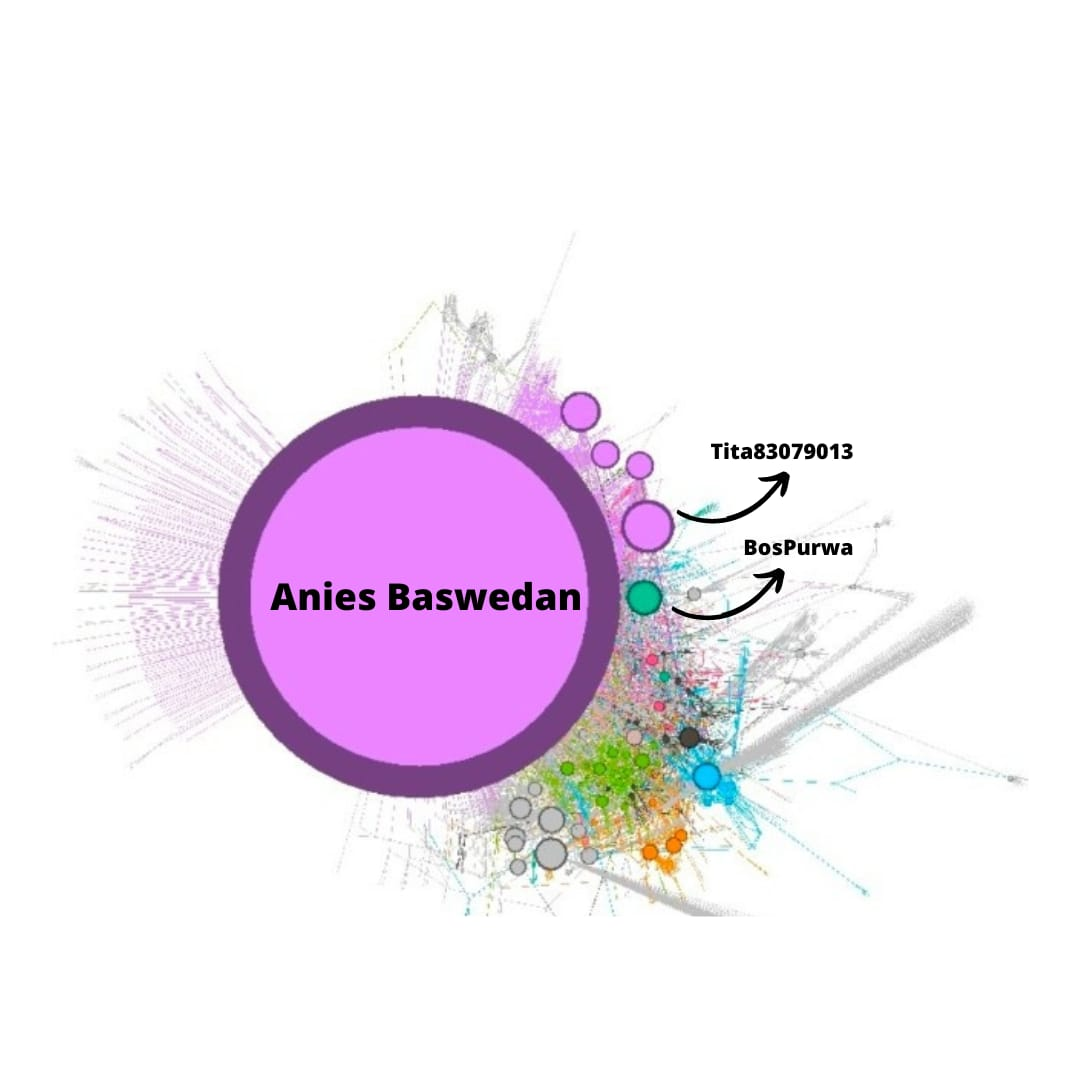

Interpretasi : Berdasarkan hasil visualisasi dengan menggunakan gephi di atas, dapat dilihat bahwa pada perbincangan pilpres 2024 yang menjadi centralizer atau user yang paling berpengaruh adalah
1. Anies Baswedan
2. Tita83079013
3. BosPurwa 

- Dilihat dari pemilik akun twitter bernama Tita83079013 : Lebih sering membahas konten-konten (tweets) yang bersifat kontra kepada capres Anies Baswedan dengan ujaran kebencian lainnya dan berita-berita yang sedang hangat dibicarakan.

- Dilihat dari pemilik akun twitter bernama BosPurwa : Membahas konten-konten (tweets) yang bersifat pro kepada capres Anies Baswedan dengan kata-kata dukungan lainnya. Terutama pada tweet yang diunggah oleh BosPurwa mengenai video Anies Baswedan yang berjudul 'Dua Tangan Negara', membahas Ekonomi Sosial yang di-retweets lebih dari seribu user twitter.

### Kesimpulan Akhir

Berdasakan penelitian sentimen analisis yang telah dilakukan, maka dapat diambil kesimpulan sebagai berikut : 

- Analisis sentimen jejaring sosial dengan metode Social Network Analysis (SNA) telah berhasil diterapkan untuk melakukan indentifikasi pembahasan pilpres tahun 2024 yang paling berpengaruh dalam sosial media twitter
adalah Anies Baswedan dan Ganjar Pranowo. Dalam Hal ini dengan melakukan analisis adanya pengaruh komentar negatif dan positif yang bertebaran di sosial media Twitter
yaitu pada komentar positif Anies Baswedan yaitu 'Yohanes', 'Pak', dan 'Nasdem' dengan pembahasan paling banyak, sementara untuk Ganjar Pranowo yaitu 'Sahabat Ganjar', 'Ganjar pilihan rakyat', dan 'Ganjar hebat' hal ini menunjukan pembahasan dengan komentar yang lebih positif saat ini di sosial media Twitter ada pada Paslon pilpres 2024 yaitu  Anies Baswedan.

- Dan dapat dilihat bahwa pada perbincangan pilpres 2024 yang menjadi centralizer atau user yang paling berpengaruh adalah
1. Anies Baswedan
2. Tita83079013
3. BosPurwa